In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/home/hammadali08/Vidoes/CSV file/Social_Network_Ads.csv")
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
data.drop(columns=['User ID'],inplace=True)
data.drop(columns=['Gender'],inplace=True)

In [4]:
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

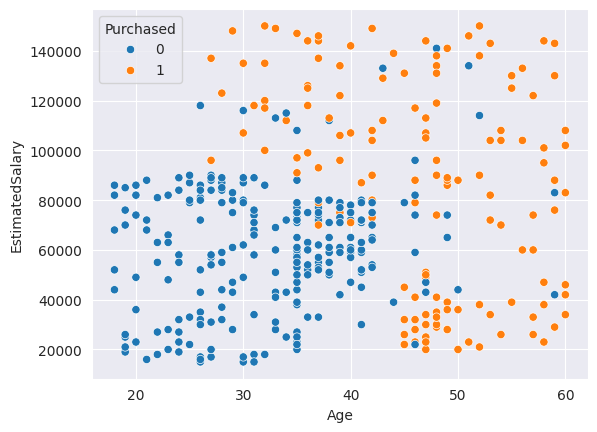

In [5]:
sns.scatterplot(x='Age',y='EstimatedSalary',hue='Purchased',data=data)

In [6]:
from  sklearn.preprocessing import StandardScaler

In [7]:
ss=StandardScaler()

In [8]:
ss.fit(data[['Age','EstimatedSalary']])

StandardScaler()

In [9]:
df=ss.transform(data[['Age','EstimatedSalary']])
df

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [10]:
data[['Age','EstimatedSalary']]=df

In [11]:
data

,Age,EstimatedSalary,Purchased
0,-1.781797,-1.490046,0
1,-0.253587,-1.460681,0
2,-1.113206,-0.785290,0
3,-1.017692,-0.374182,0
4,-1.781797,0.183751,0
...,...,...,...
395,0.797057,-0.844019,1
396,1.274623,-1.372587,1
397,1.179110,-1.460681,1
398,-0.158074,-1.078938,0


In [12]:
x=data.iloc[:,:-1]
y=data['Purchased']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dtc=DecisionTreeClassifier()

In [32]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [33]:
dtc.score(x_test,y_test),dtc.score(x_train,y_train)

(0.8375, 0.996875)

The difference between two scores is Overfitting and can be improved with max_depth function in DecisionTreeClassifier

In [38]:
from sklearn.tree import plot_tree

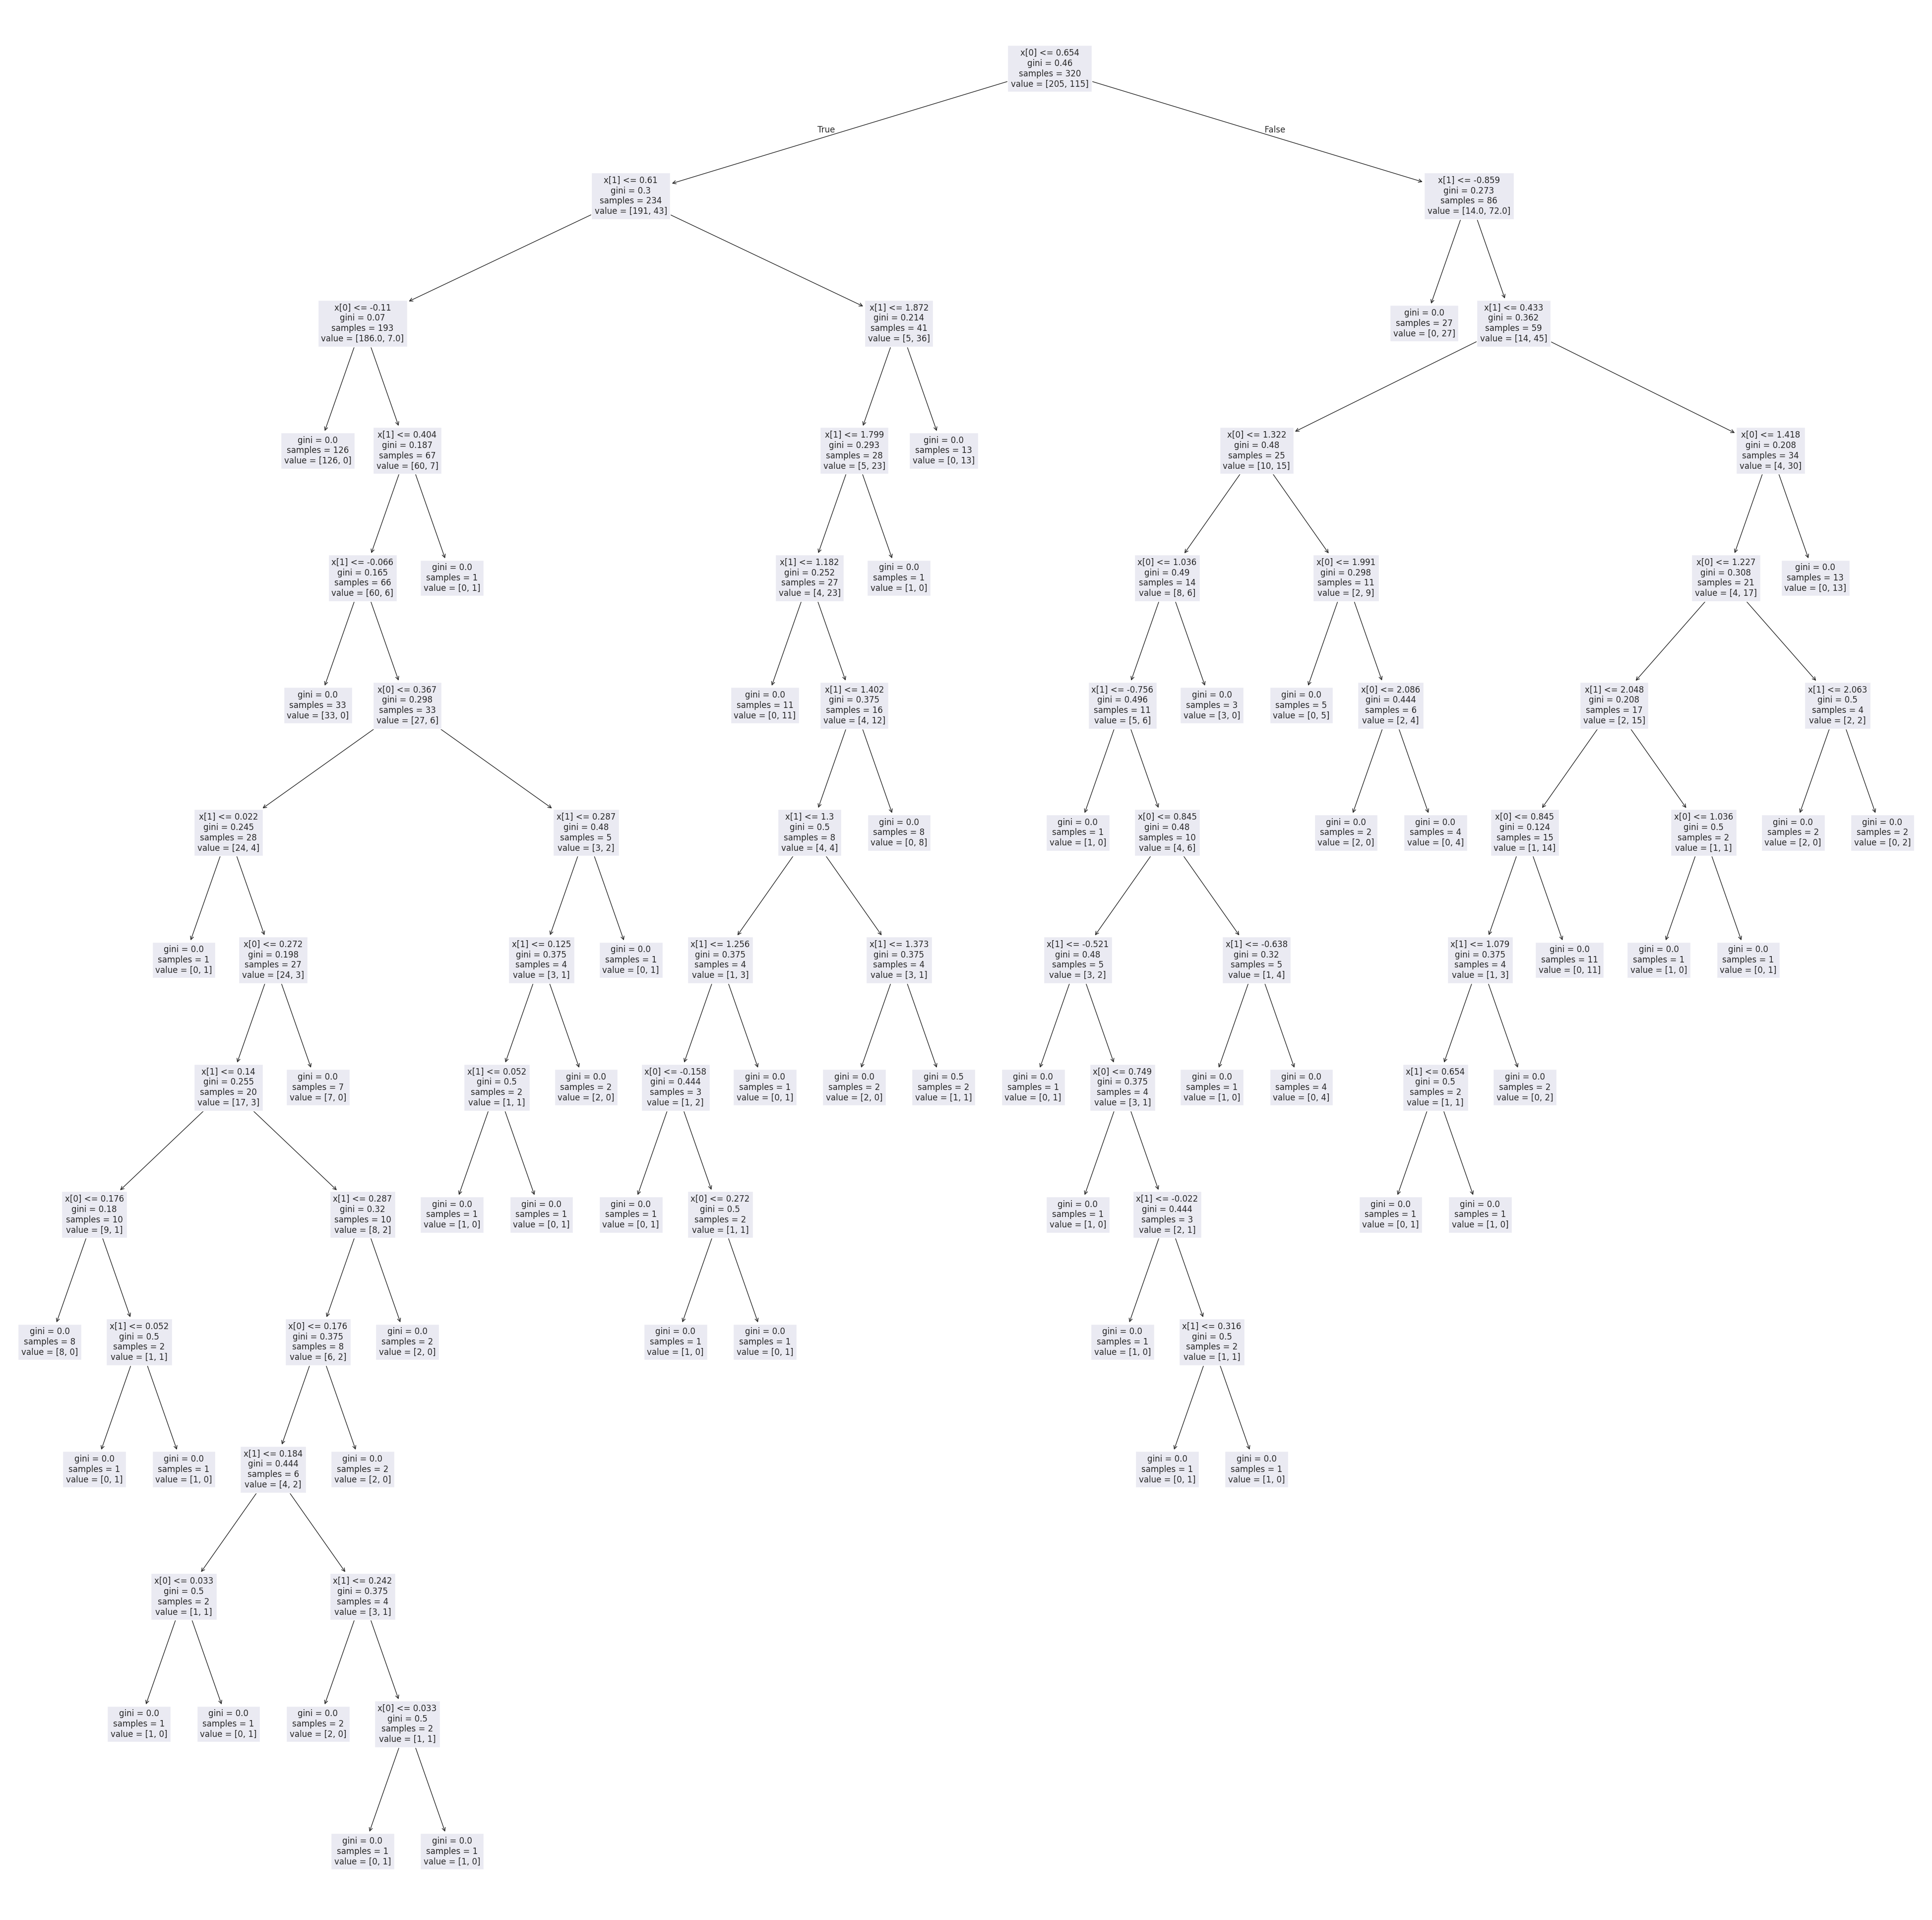

In [35]:
plt.figure(figsize=[50,50])
plot_tree(dtc)
plt.savefig("tree.png")
plt.show()

In [36]:
from mlxtend.plotting import plot_decision_regions

/home/hammadali08/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


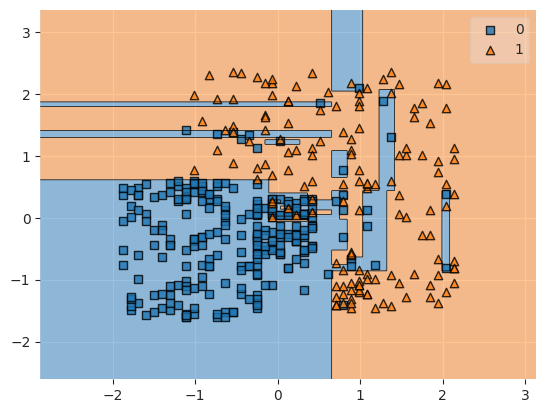

In [37]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dtc)
plt.show()

# Lets try with max_depth

# Pre Puning

In [47]:
dtc1=DecisionTreeClassifier(max_depth=3)

In [48]:
dtc1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [49]:
dtc1.score(x_test,y_test),dtc1.score(x_train,y_train)

(0.9125, 0.91875)

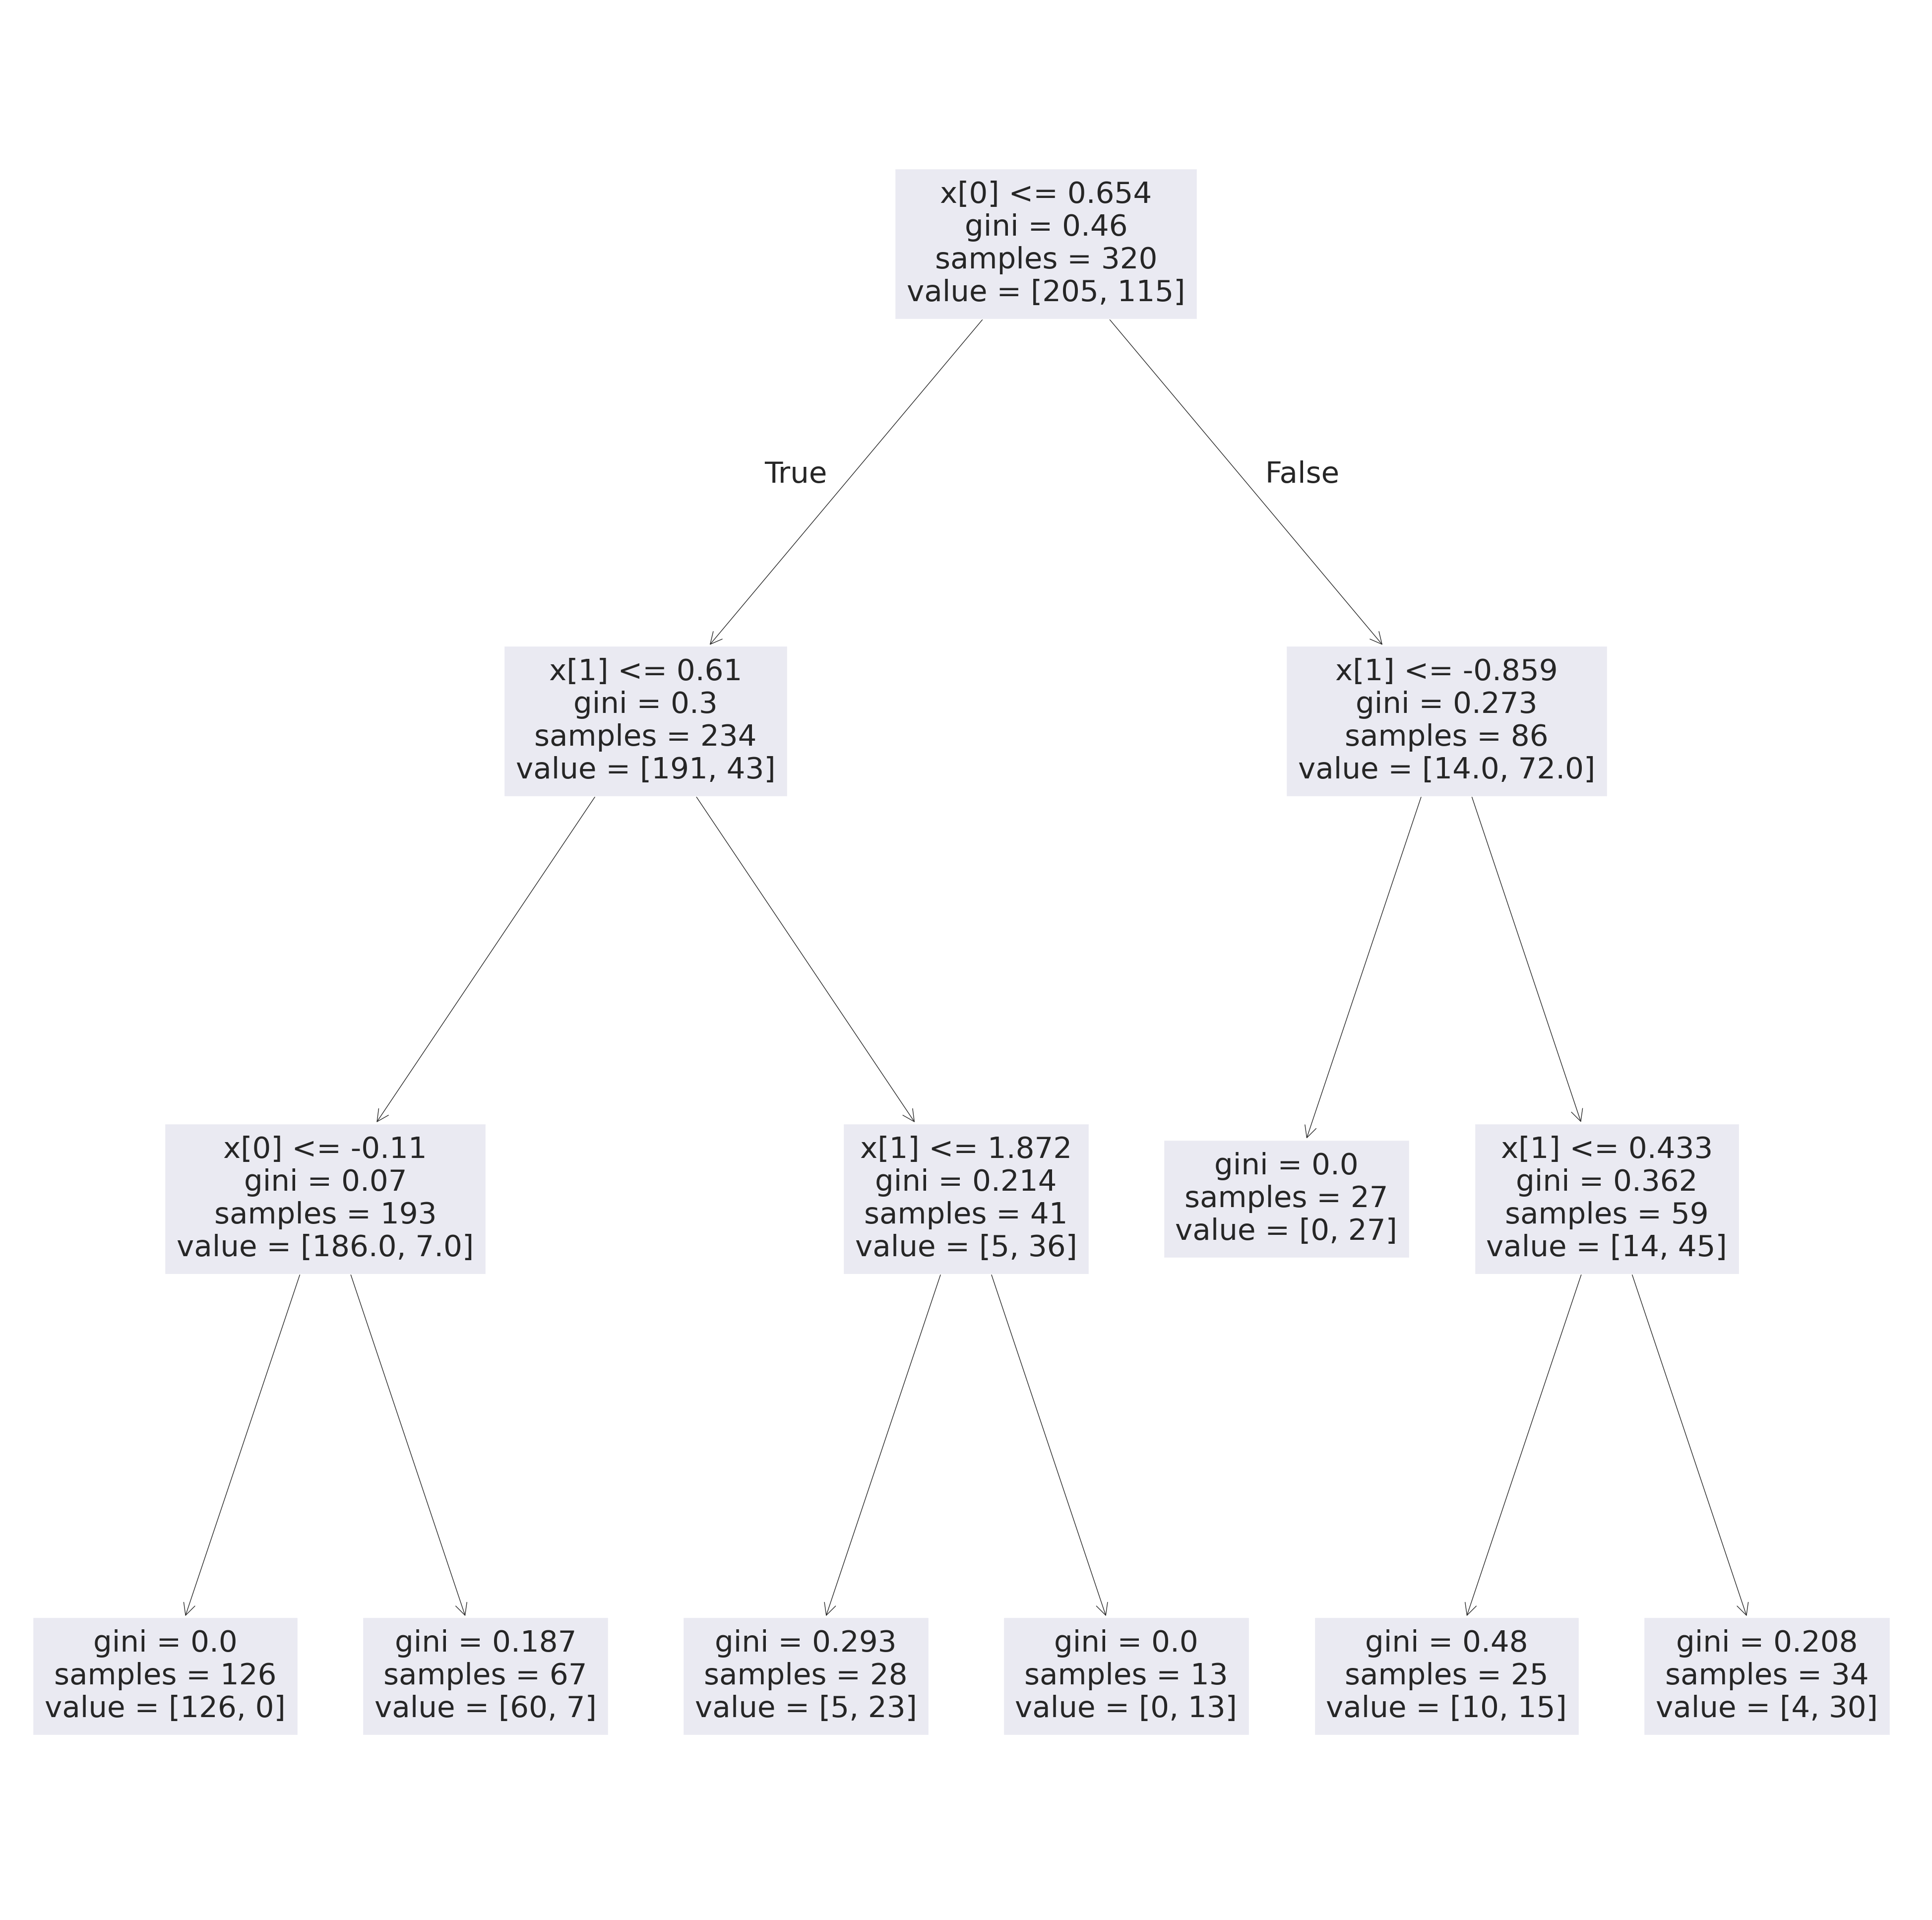

In [50]:
plt.figure(figsize=[50,50])
plot_tree(dtc1)
plt.show()

/home/hammadali08/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


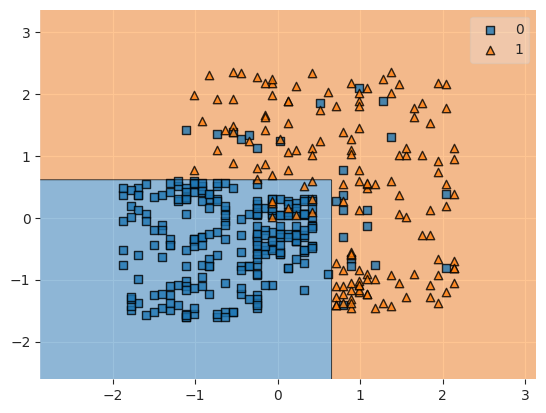

In [51]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dtc1)
plt.show()

# Post Puning

This shows what value of Max Depth is best to be used

In [46]:
for i in range(1,20):
    dtc2=DecisionTreeClassifier(max_depth=i)
    dtc2.fit(x_train,y_train)
    print(dtc2.score(x_test,y_test),dtc2.score(x_train,y_train), i)

0.9 0.821875 1
0.9125 0.91875 2
0.9125 0.91875 3
0.9125 0.93125 4
0.9 0.934375 5
0.8625 0.95 6
0.85 0.96875 7
0.85 0.975 8
0.85 0.98125 9
0.85 0.984375 10
0.8375 0.990625 11
0.8375 0.990625 12
0.8375 0.99375 13
0.8375 0.996875 14
0.8375 0.996875 15
0.8375 0.996875 16
0.8375 0.996875 17
0.8375 0.996875 18
0.8375 0.996875 19
